In [0]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms  as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt


### Load Dataset

In [0]:
train = datasets.MNIST(root='./MNIST', train=True, download=True, transform=transforms.ToTensor())
test = datasets.MNIST(root='./MNIST', train=False, download=True, transform=transforms.ToTensor())

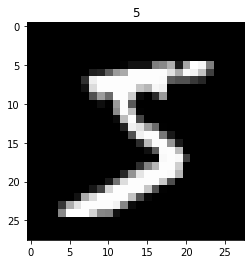

In [0]:
plt.imshow(train[0][0].view(28, 28), cmap='gray')
plt.title(train[0][1])
plt.show()

In [0]:
train_dl = DataLoader(dataset=train, batch_size=512, shuffle=True)
test_dl = DataLoader(dataset=test, batch_size=512, shuffle=True)

#### Create Linear Model

In [0]:
class MNIST(nn.Module):
  
  def __init__(self, inp, out):
    super(MNIST, self).__init__()
    self.linear = nn.Linear(in_features=inp, out_features=out)
  
  def forward(self, x):
    return self.linear(x)
 
    

In [0]:
features = 28*28
output = 10

In [0]:
model = MNIST(features, output)

In [0]:
print(model)
# print(list(model.parameters()))

MNIST(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


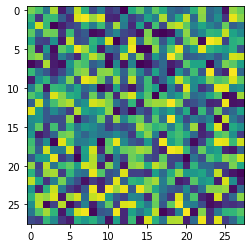

In [0]:
plt.imshow(list(model.parameters())[0][1].view(28, 28).detach().numpy());

In [0]:
list(model.parameters())[1][1].shape

torch.Size([])

In [0]:
print(model)

MNIST(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [0]:
# Print the parameters

print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


In [0]:
# The function to plot parameters

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

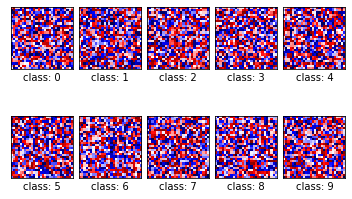

In [0]:
# Plot the model parameters for each class

PlotParameters(model)

In [0]:
epochs = 100
lr = 0.01
Loss = []
acc = []

In [0]:
optimizer = torch.optim.SGD(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

In [0]:
for epoch in range(epochs):
  
  for x, y in train_dl:
#     print(x.shape)
    
    yhat = model.forward(x.view(-1, 28*28))
    
    loss = criterion(yhat, y)
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    Loss.append(loss.item())
    
  # count test accuracy
  count = 0
  for x, y in test_dl:
    pred = model.forward(x.view(-1, 28*28))
    _, yhat = torch.max(pred.data, 1)
    
    count += (y==yhat).sum().item()
  acc.append(count/len(test))
  
  if epoch%(epochs//5)==0:
    print(f'Loss = {Loss[-1]}  |   test_acc = {acc[-1]}')

Loss = 0.2473880499601364  |   test_acc = 0.9135
Loss = 0.22843267023563385  |   test_acc = 0.9151
Loss = 0.24059952795505524  |   test_acc = 0.9159
Loss = 0.33350375294685364  |   test_acc = 0.9168
Loss = 0.42675817012786865  |   test_acc = 0.9181


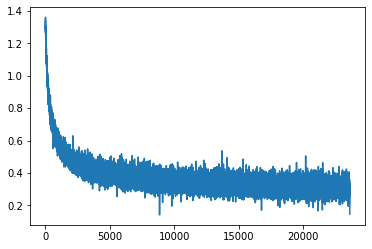

In [0]:
plt.plot(Loss)

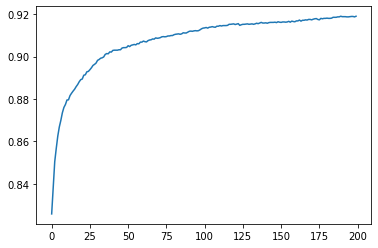

In [0]:
plt.plot(acc)

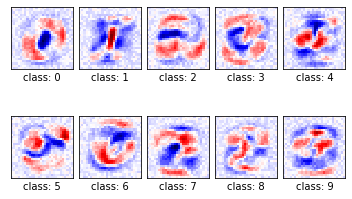

In [0]:
PlotParameters(model)

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.utils import shuffle

In [0]:
def load_data():
    data = load_breast_cancer()
    
    # get the features
    x = data.data
    y = data.target
    
    x, y = shuffle(x, y)
    
    # normalize the features
    x = (x - np.mean(x))/np.std(x)
    
    
    # convert e'm into numpy
    x = torch.from_numpy(x)
    y = torch.from_numpy(y)
    
    # change the type
    x = x.type(torch.float32)
    y = y.type(torch.float32)
    
    # reshape
    y = y.view(-1, 1)
    
    return x, y

In [0]:
class Data(Dataset):
    
    def __init__(self):
        self.x, self.y = load_data()
        self.len = self.x.shape[0]
    
    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len


In [0]:
dataset = Data()

In [0]:
dataset.x.shape

torch.Size([569, 30])

In [0]:
train_dl = DataLoader(dataset=dataset, batch_size=64, shuffle=True)

In [0]:
# model
model = nn.Sequential(nn.Linear(30,  20), nn.Sigmoid(), nn.Linear(20, 10), nn.Sigmoid(), nn.Linear(10, 1), nn.Sigmoid())

In [0]:
# print(list(model.parameters()))

In [0]:
epochs = 10000
Loss = []
acc = []
lr = 0.1

In [0]:
opt = torch.optim.SGD(model.parameters(), lr=0.1)
criterian = nn.MSELoss()

In [0]:
for epoch in range(epochs):
  
  for x, y in train_dl:
    yhat = model(x)
    loss = criterian(yhat, y)
    opt.zero_grad()
    loss.backward()
    opt.step()
    Loss.append(loss.item())
    
  if epoch%(epochs//5)==0:
    print(f'epoch {epoch} | loss {Loss[-1]}')
    

epoch 0 | loss 0.041094936430454254
epoch 2000 | loss 0.0411110445857048
epoch 4000 | loss 0.02514505572617054
epoch 6000 | loss 0.04112646356225014
epoch 8000 | loss 0.02027657814323902


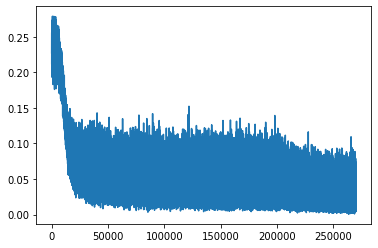

In [0]:
plt.plot(Loss)

In [0]:
# Make the Prediction
yhat = model.forward(dataset.x)
label = yhat > 0.5
print("The accuracy: ", torch.mean((label == dataset.y.type(torch.ByteTensor)).type(torch.float)))

The accuracy:  tensor(0.9596)
